# Stochastic infectious pulse
https://github.com/alvason/stochastic-infectious-pulse

### Stochastic version for evolutionary insights

In [1]:
'''
author: Alvason Zhenhua Li
date:   07/07/2015
'''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import os
dir_path = '/Users/al/Desktop/GitHub/stochastic-infectious-pulse/figure'
file_name = 'stochastic-natural-growth'

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 8)
numberingFig = 0


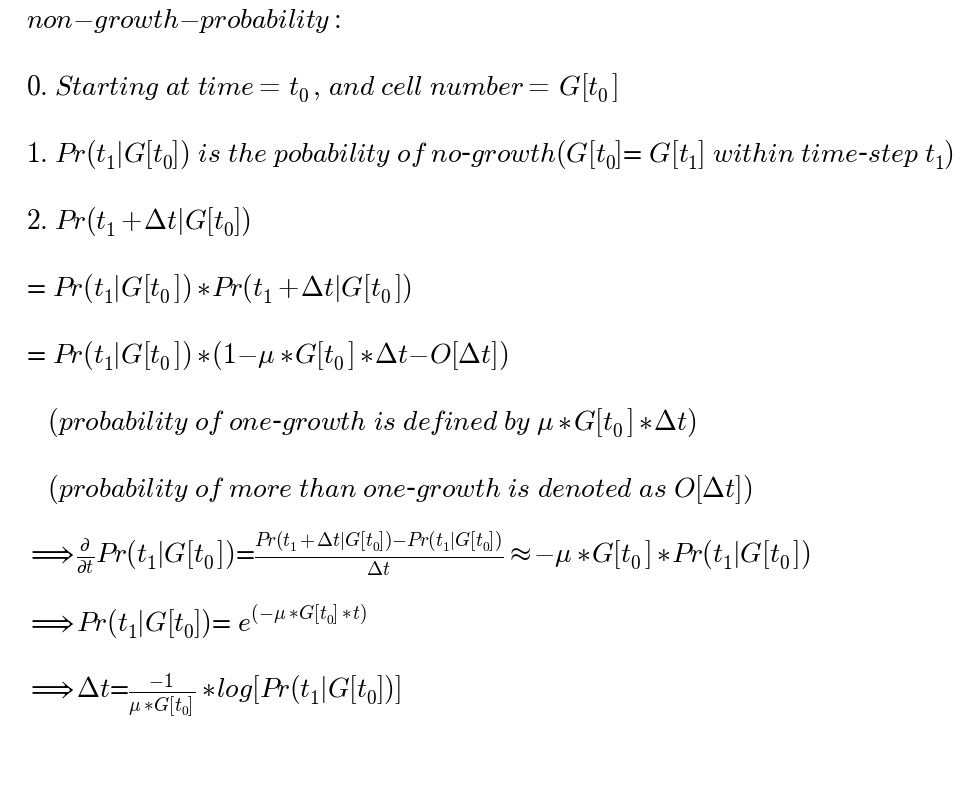

In [39]:
# non-growth probability
figure_name = '-non-growth-probability'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ non-growth-probability: $'
             , r'$ 0. \ Starting \ at \ time = \ t_0, \ and \ cell \ number = \ G[t_0] $'
             , r'$ 1. \ Pr(t_{1} | G[t_{0}]) \ is \ the \ pobability \ of \ no$-$growth \
                     (G[t_{0}] \equal \ G[t_{1}] \ within \ time$-$step \ t_{1}) $'
             , r'$ 2. \ Pr(t_{1}+\Delta{t} | G[t_{0}]) $'
             , r'$ \equal \ Pr(t_{1} | G[t_0]) * Pr(t_{1}+\Delta{t} | G[t_0]) $'
             , r'$ \equal \ Pr(t_{1} | G[t_0]) * (1 - \mu*G[t_0]*\Delta{t} - O[\Delta{t}]) $'
             , r'$ \ \ \ (probability \ of \ one$-$growth \ is \ defined \ by \ \mu*G[t_0]*\Delta{t}) $'
             , r'$ \ \ \ (probability \ of \ more \ than \ one$-$growth \ is \ denoted \ as \ O[\Delta{t}]) $'
             , r'$ \Longrightarrow \frac{\partial}{\partial{t}}Pr(t_{1} | G[t_0]) \equal \
                     \frac{Pr(t_{1} + \Delta{t} | G[t_{0}]) - Pr(t_{1} | G[t_{0}])}{\Delta{t}} \approx \
                     -\mu*G[t_0]*Pr(t_{1} | G[t_0]) $'
             , r'$ \Longrightarrow Pr(t_{1} | G[t_{0}]) \equal \ e^{(-\mu*G[t_{0}]*t)} $'
             ,r'$ \Longrightarrow \Delta{t} \equal \frac{-1}{\mu*G[t_{0}]} * log[Pr(t_{1} | G[t_{0}])]  $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list, total_list*1.2))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

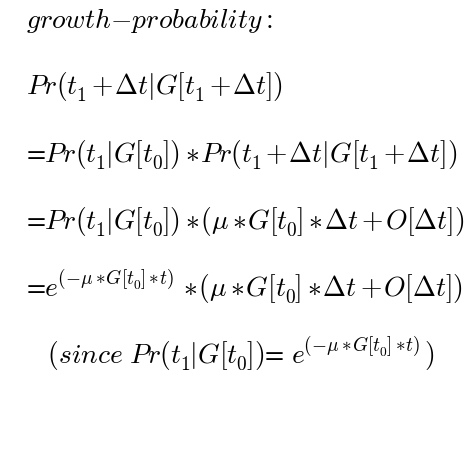

In [50]:
# growth probability
figure_name = '-growth-probability'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ growth-probability: $'
             , r'$ Pr(t_{1} + \Delta{t} | G[t_{1}+\Delta{t}]) $'
             , r'$ \equal Pr(t_{1} | G[t_{0}]) * Pr(t_{1}+\Delta{t} | G[t_{1}+\Delta{t}]) $'
             , r'$ \equal Pr(t_{1} | G[t_{0}]) * (\mu*G[t_{0}]*\Delta{t} + O[\Delta{t}] ) $'
             , r'$ \equal e^{(-\mu*G[t_{0}]*t)} * (\mu*G[t_{0}]*\Delta{t} + O[\Delta{t}] ) $'
             , r'$ \ \ \ (since \ Pr(t_{1} | G[t_{0}]) \equal \ e^{(-\mu*G[t_{0}]*t)} ) $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list, total_list*1.2))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

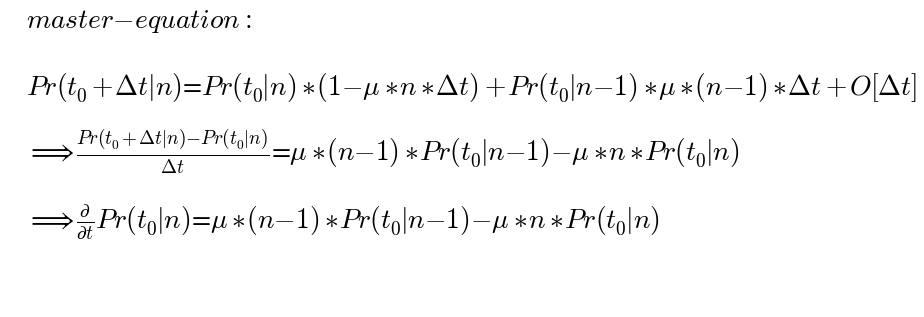

In [59]:
# master equation
figure_name = '-master-equation'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ master-equation: $'
             , r'$ Pr(t_{0} + \Delta{t} | n) \
                     \equal Pr(t_{0} | n) * (1 - \mu*n*\Delta{t}) + Pr(t_{0} | n-1)*\mu*(n-1)*\Delta{t} + O[\Delta{t}] $'
             , r'$ \Longrightarrow \frac{Pr(t_{0} + \Delta{t} | n) - Pr(t_{0} | n)}{\Delta{t}} \
                     \equal \mu*(n-1)*Pr(t_{0} | n-1) - \mu*n*Pr(t_{0} | n) $'
             , r'$ \Longrightarrow \frac{\partial{}}{\partial{t}}Pr(t_{0} | n) \
                     \equal \mu*(n-1)*Pr(t_{0} | n-1) - \mu*n*Pr(t_{0} | n) $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list, total_list*1.2))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

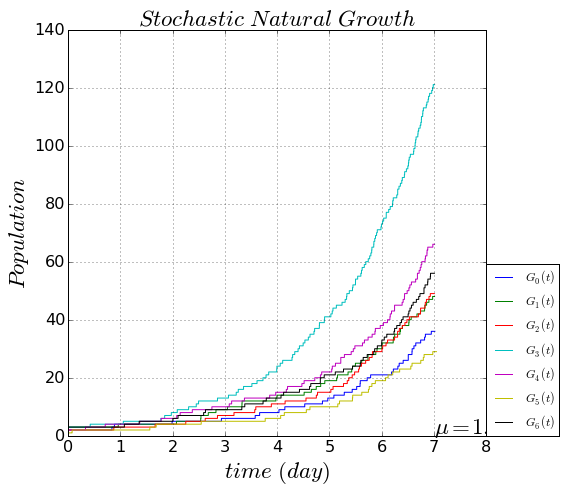

In [23]:
''' define simple stochastic natural growth function '''
def stochasticNaturalGrowth(total_step, minT, maxT, initial_G, inRate, noRate):
    # intialized
    gT = np.zeros([total_step]) 
    gG = np.zeros([total_step]) 
    j = int(0)
    gT[j] = minT
    gG[j] = initial_G
    # all possible events
    event_in = inRate*gG[j]
    event_no = noRate*gG[j]
    # configuration table
    eventRate_updateNum = np.array([[event_in, +1]
                                  , [event_no, 0]])
    ###
    while (gT[j] < maxT):       
        # randomly choose event
        randomSeed = np.random.random()
        if  randomSeed < (np.sum(eventRate_updateNum[0:1, 0]) / np.sum(eventRate_updateNum[:, 0])):
            k = 0
            dt = (-1.0/(inRate*gG[j]))*np.log(1 - randomSeed)
        else:
            k = 1
            dt = (-1.0/(inRate*gG[j]))*np.log(randomSeed)
        # update number of section
        gG[j] = gG[j] + eventRate_updateNum[k, 1]
        # update event_rate
        event_in = inRate*gG[j]
        event_no = noRate*gG[j]
        # configuration table
        eventRate_updateNum = np.array([[event_in, +1]
                                      , [event_no, 0]])
        dt = (-1.0/(inRate*gG[j]))*np.log(randomSeed)
        # next step is based on current step
        gT[j + 1] = gT[j] + dt 
        gG[j + 1] = gG[j]
        j = j + 1
    # set the value of remaining steps = value of the last step (for ending)
    gT[j:] = gT[j]
    gG[j:] = gG[j]
    ###
    return(gT, gG)

''' starting from one infected '''
# setting parameter
timeUnit = 'day'
if timeUnit == 'day':
    day = 1
    year = 365 
elif timeUnit == 'year':
    year = 1
    day = float(1)/365 
    
total_N = 10000
initial_G = 1
# set parameter
inRate = float(1)/(day) # birth rate per year
noRate = float(1)/(day) # birth rate per year
# initial boundary condition
minT = float(0*day)
maxT = float(7*day)

total_step = int(maxT*total_N)
# stochastic evolution way
total_way = int(7)
gTT = np.zeros([total_way, total_step]) 
gGG = np.zeros([total_way, total_step]) 


for i in range(total_way):
    evolution = stochasticNaturalGrowth(total_step, minT, maxT, initial_G, inRate, noRate)
    gTT[i] = evolution[0]
    gGG[i] = evolution[1]
# plotting
figure_name = '-growth'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = (7, 7))
for i in range(total_way):
    plt.plot(gTT[i], gGG[i], label = r'$ G_{:}(t) $'.format(i), drawstyle = 'steps') 
#plt.plot(gTT[0], initial_G*np.exp(inRate*gTT[0]), linewidth = 9
 #        , color = 'black', alpha = 0.3, label = r'$ Natural \ Growth $') 
plt.grid(True)
plt.title(r'$ Stochastic \ Natural \ Growth $', fontsize = AlvaFontSize)
plt.xlabel(r'$ time \ ({:})$'.format(timeUnit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Population $', fontsize = AlvaFontSize)
plt.legend(loc = (1,0))
plt.text(maxT, 1.0, r'$ \mu = {:} $'.format(inRate), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.7)
plt.yticks(fontsize = AlvaFontSize*0.7) 
figure.tight_layout()
plt.savefig(save_figure, dpi = 100, bbox_inches='tight')
plt.show()